# GRACEFUL17 Workbench

## Install and Import Package

First we need to import the dataria toolkit as a Python Package to use its functions in this Notebook

You need to repeat this time for every runtime

Read https://dataria-py-utils.readthedocs.io

In [ ]:
!pip install git+https://github.com/ch-sander/dataria-py-utils.git

  Cloning https://github.com/ch-sander/dataria-py-utils.git to /tmp/pip-req-build-6zyrlwhz
  Running command git clone --filter=blob:none --quiet https://github.com/ch-sander/dataria-py-utils.git /tmp/pip-req-build-6zyrlwhz
  Resolved https://github.com/ch-sander/dataria-py-utils.git to commit ce0652577b749d139e97e2e1b09129b20c49a08f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 12.7 MB/s eta 0:00:00
  Created wheel for dataria: filename=dataria-0.1.3-py3-none-any.whl size=11720 sha256=7d7b7fae838a9df5804fbd2d84ea0926338d0234b0113ea85864463a75a7a0d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-8mrr1nis/wheels/f2/cb/0f/80d35689

In [ ]:
# if needed, use dev deploy
# !pip install git+https://github.com/ch-sander/dataria-py-utils.git@dev

  Cloning https://github.com/ch-sander/dataria-py-utils.git (to revision dev) to /tmp/pip-req-build-o1xn17zt
  Running command git clone --filter=blob:none --quiet https://github.com/ch-sander/dataria-py-utils.git /tmp/pip-req-build-o1xn17zt
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Resolved https://github.com/ch-sander/dataria-py-utils.git to commit 4a9226ec3d03753f787c536aa3b0097f8df7f749
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 25.5 MB/s eta 0:00:00
  Created wheel for dataria: filename=dataria-0.1.6-py3-none-

In [ ]:
import dataria

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


## Define Global Variables

These variables will remain unchanged for all calls

In [ ]:
endpoint_url="https://graph.dhi-roma.it/query"

## Examples


### GEO

Examples for maps and GIS.
These examples are based on the `GEO` module in `dataria`. They rely on a SPARQL query

#### Benefices linked to Ecclesiastical Provinces

First you define the query this analysis or is based on

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?ecclesiastical_province_1 ?ecclesiastical_province_1_label ?map_8 (COUNT(DISTINCT ?object_4) AS ?object_4_count) WHERE {
  ?ecclesiastical_province_1 rdf:type grace:ecclesiastical_province;
    grace:called ?ecclesiastical_province_1_label;
    (grace:governs*) ?institution_2.
  ?institution_2 rdf:type grace:institution;
    grace:holds_object ?object_4.
  ?object_4 rdf:type grace:object;
    grace:called ?object_4_label.
  ?ecclesiastical_province_1 grace:wkt ?map_8.
}
GROUP BY ?ecclesiastical_province_1 ?ecclesiastical_province_1_label ?map_8
LIMIT 10000
"""

In [ ]:
query_dioceses_test="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
PREFIX g17: <https://g17.dhi-roma.it/resources/>

SELECT DISTINCT (COUNT(DISTINCT ?IMMATERIAL_OBJECT_1) AS ?IMMATERIAL_OBJECT_1_count) ?INSTITUTION_2 ?INSTITUTION_2_label ?PLACE_4 ?PLACE_4_label ?map_1053_4 WHERE {
  ?IMMATERIAL_OBJECT_1 rdf:type grace:benefice;
    grace:called ?IMMATERIAL_OBJECT_1_label;
    grace:testified_by/grace:in_source ?SOURCE;
    grace:in_diocese ?INSTITUTION_2.
  ?INSTITUTION_2 rdf:type grace:institution;
    grace:called ?INSTITUTION_2_label;
    grace:wkt ?map_1053_4;
    grace:primary_place ?PLACE_4.
  ?PLACE_4 rdf:type grace:place;
    grace:called ?PLACE_4_label.
   # grace:wkt ?map_1053_4.
  VALUES ?SOURCE {
    g17:source_1
    g17:source_2
  }
  # FILTER(<http://www.opengis.net/def/function/geosparql/sfWithin>(?map_1053_4, "Polygon((-3.9440917968750004 40.5534610833091, -3.9440917968750004 44.31402269883775, 7.701416015625001 44.31402269883775, 7.701416015625001 40.5534610833091, -3.9440917968750004 40.5534610833091))"^^<http://www.opengis.net/ont/geosparql#wktLiteral>))
}
GROUP BY ?INSTITUTION_2 ?INSTITUTION_2_label ?PLACE_4 ?PLACE_4_label ?map_1053_4
LIMIT 10000
"""

Next, you define some configuration for the module that renders the map (called `explore` in the `geopandas` package)

In [ ]:
explore_kwargs = {
    'cmap': 'viridis', # the color map
    'k': 15, # the number of clusters
    'scheme': 'NaturalBreaks' # the method to calculate clusters
}

Finally, you call the `explore` function in `dataria.GEO`

In [ ]:
dataria.GEO.explore(
    endpoint_url=endpoint_url, # as defined above
    query=query, # as defined above
    geo_var="map_8", # the name of the variable in the query that return the coordinates
    label_var="ecclesiastical_province_1_label", # the query variable for label for the entity shown on the map
    cluster_weight_var="object_4_count",  # the query variable for entity counted per entity shown on map
    **explore_kwargs  # as defined above
)

In [ ]:
dataria.GEO.explore(
    endpoint_url=endpoint_url, # as defined above
    query=query_dioceses_test, # as defined above
    geo_var="map_1053_4", # the name of the variable in the query that return the coordinates
    label_var="INSTITUTION_2_label", # the query variable for label for the entity shown on the map
    cluster_weight_var="IMMATERIAL_OBJECT_1_count",  # the query variable for entity counted per entity shown on map
    **explore_kwargs  # as defined above
    )

### Time

Examples for temporal analyses. These examples are based on the `CHRON` module in `dataria`. They rely on a SPARQL query

#### Events per Start Date

First you define the query this analysis or is based on

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?EVENT_1 ?EVENT_1_label ?date_started (SUM(DISTINCT ?appellation_898_13) AS ?num) WHERE {
  ?EVENT_1 rdf:type grace:event;
    grace:called ?EVENT_1_label;
    grace:event_date ?DATE_2.
  ?DATE_2 rdf:type grace:date;
    grace:started ?date_started.
  ?EVENT_1 ((grace:object_object*)|(grace:event_object*))/grace:type_object ?TYPE_11.
  ?TYPE_11 rdf:type grace:type;
    grace:ranking ?appellation_898_13.
}
GROUP BY ?EVENT_1 ?EVENT_1_label ?date_started
LIMIT 10000
"""

You call the `aggregate_date` function in `dataria.CHRON`

Dropped 20 rows due to invalid dates in 'date_started'.
Heatmap data saved to time_aggregated_data.csv


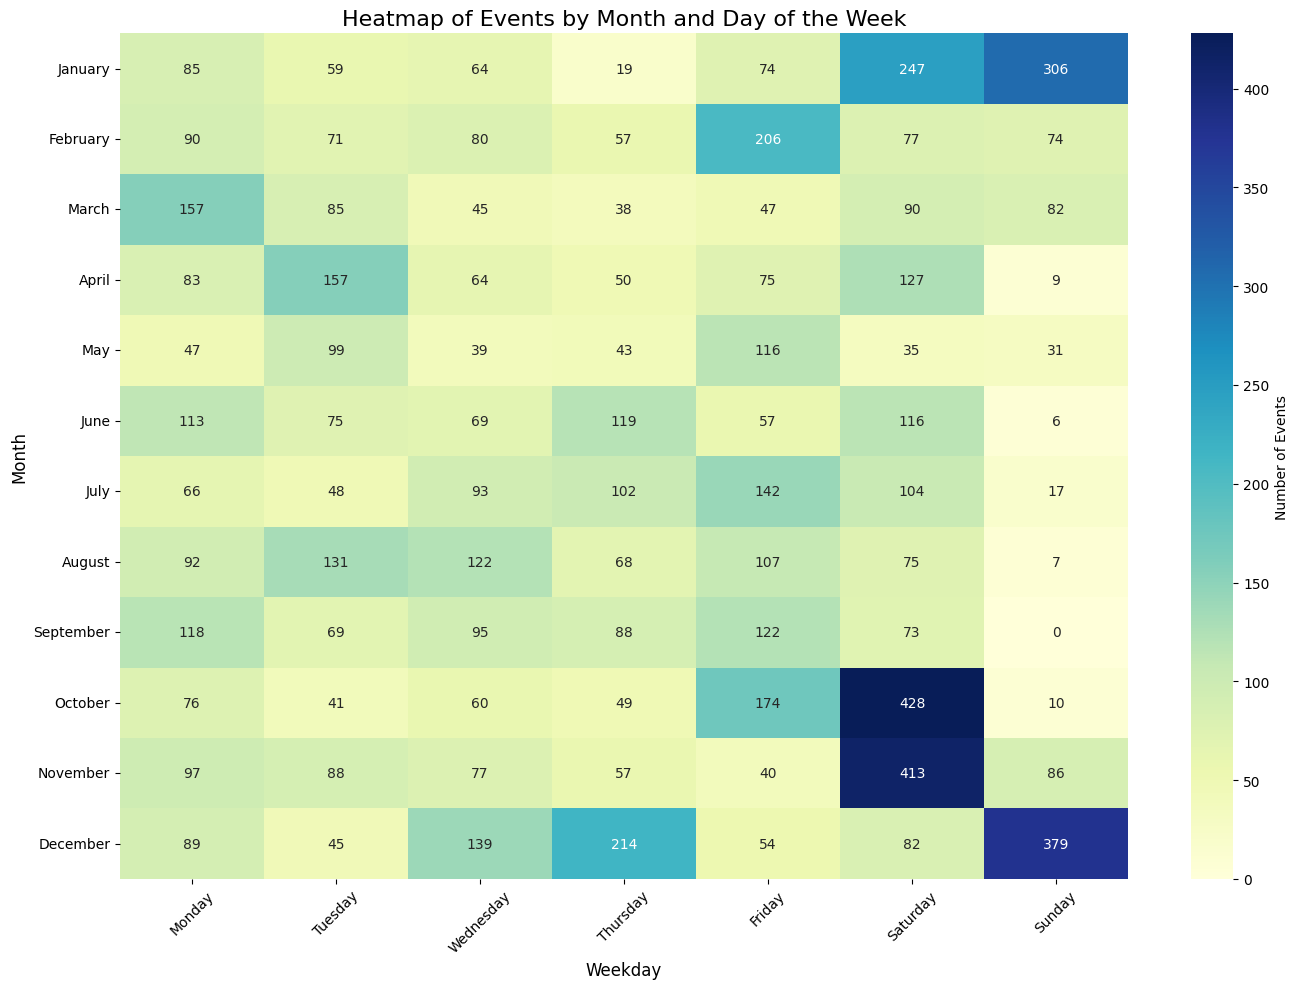

Matplotlib plot saved to <built-in method lower of str object at 0x7e61b92a52f0>_time_plot.png


<Figure size 640x480 with 0 Axes>

In [ ]:
# A heatmap for weekdays and months
dataria.CHRON.date_aggregation(endpoint_url=endpoint_url,
    query=query,date_var="date_started",plot_type='heatmap')

Dropped 20 rows due to invalid dates in 'date_started'.
Aggregated data saved to time_aggregated_data.csv


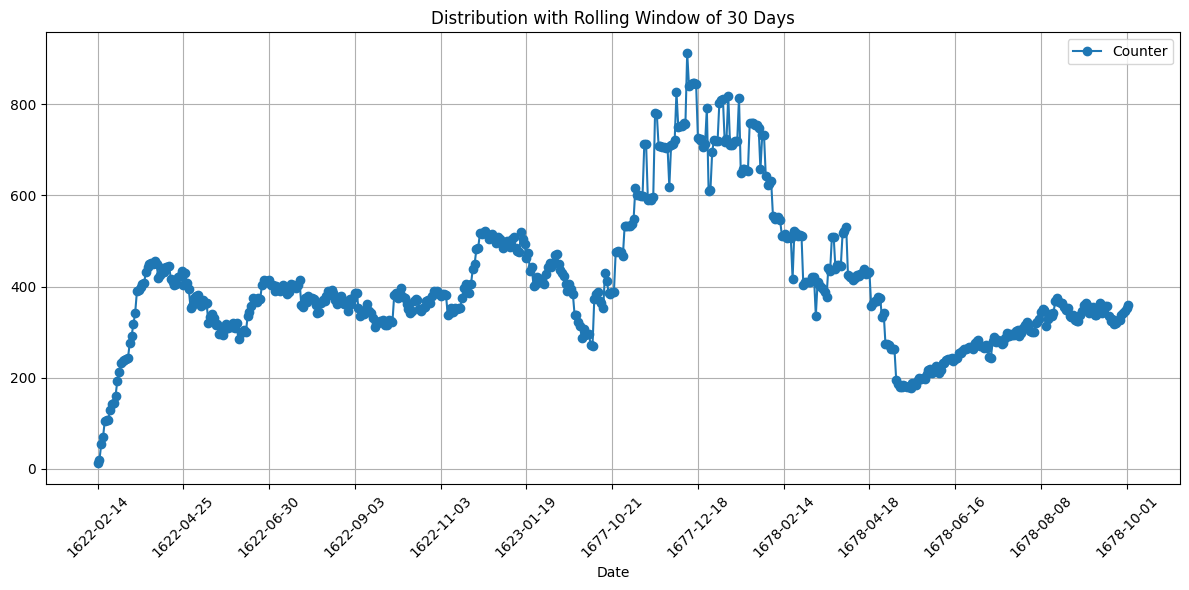

Matplotlib plot saved to <built-in method lower of str object at 0x7e616efcf0b0>_time_plot.png
Plotly plot saved to time_render.html


<Figure size 640x480 with 0 Axes>

In [ ]:
# A rolling time window chart
dataria.CHRON.date_aggregation(endpoint_url=endpoint_url,
    query=query,date_var="date_started",plot_type='rolling',window=30)

Dropped 20 rows due to invalid dates in 'date_started'.
Aggregated data saved to time_aggregated_data.csv


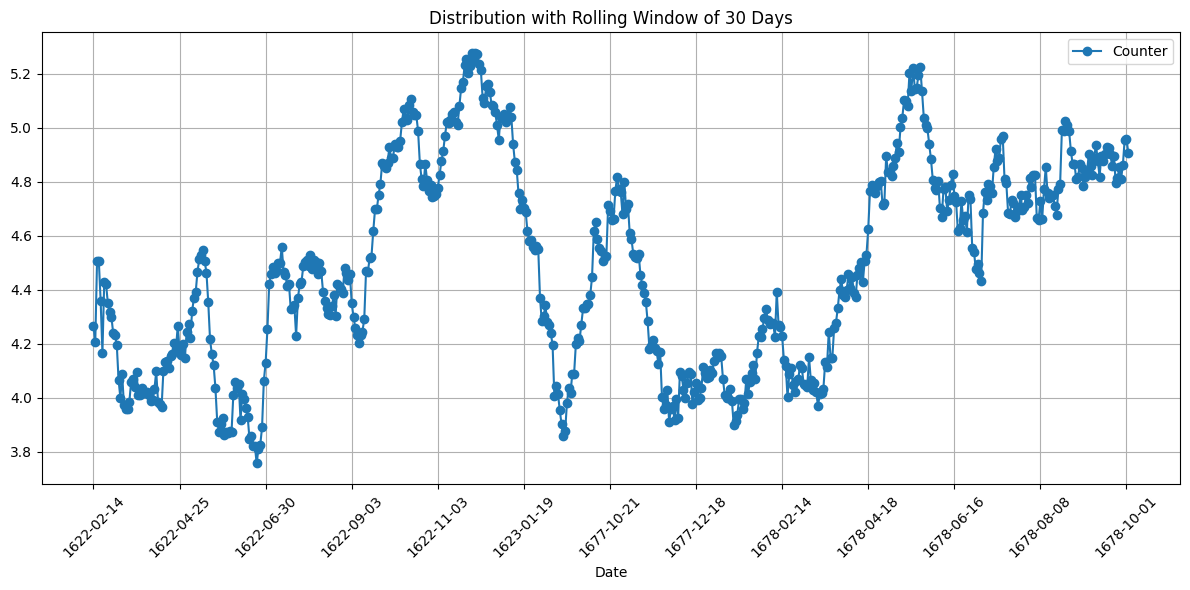

Matplotlib plot saved to <built-in method lower of str object at 0x7e616efcf0b0>_time_plot.png
Plotly plot saved to time_render.html


<Figure size 640x480 with 0 Axes>

In [ ]:
# A rolling time window chart for average rankings of types
dataria.CHRON.date_aggregation(endpoint_url=endpoint_url,
    query=query,date_var="date_started",plot_type='rolling',num_var="num", mode="mean",window=30)

### Correlation

Examples for correlation analyses. These examples are based on the `MATH` module in `dataria`. They rely on a SPARQL query

#### Correlate number of objects held per insitution with types of these objects

First you define the query this analysis or is based on

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?institution_1 ?institution_1_label (COUNT(DISTINCT ?object_2) AS ?object_2_count) (GROUP_CONCAT(DISTINCT ?name_6; SEPARATOR = ",") AS ?name_6_group_concat) ?type_8 ?type_8_label WHERE {
  ?institution_1 rdf:type grace:institution;
    grace:called ?institution_1_label;
    grace:holds_object ?object_2. # grace:holds_object is a tricky predicate, used here for simplicity
  ?object_2 rdf:type grace:object;
    grace:called ?object_2_label;
    (grace:refers_to|^grace:refers_to) ?type_4.
  ?type_4 rdf:type grace:type;
    grace:called ?name_6.
  ?institution_1 grace:has_main_type ?type_8.
  ?type_8 rdf:type grace:type;
    grace:called ?type_8_label.
}
GROUP BY ?institution_1 ?institution_1_label ?type_8 ?type_8_label
LIMIT 10000

"""

You call the `aggregate_date` function in `dataria.CHRON`

/usr/local/lib/python3.11/dist-packages/dataria/MATH.py:93: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, object_2_count vs dispensation to object_2_count vs benefice
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  133 non-null    float64
 1   P-Value      133 non-null    float64
dtypes: float64(2)
memory usage: 3.1+ KB
None


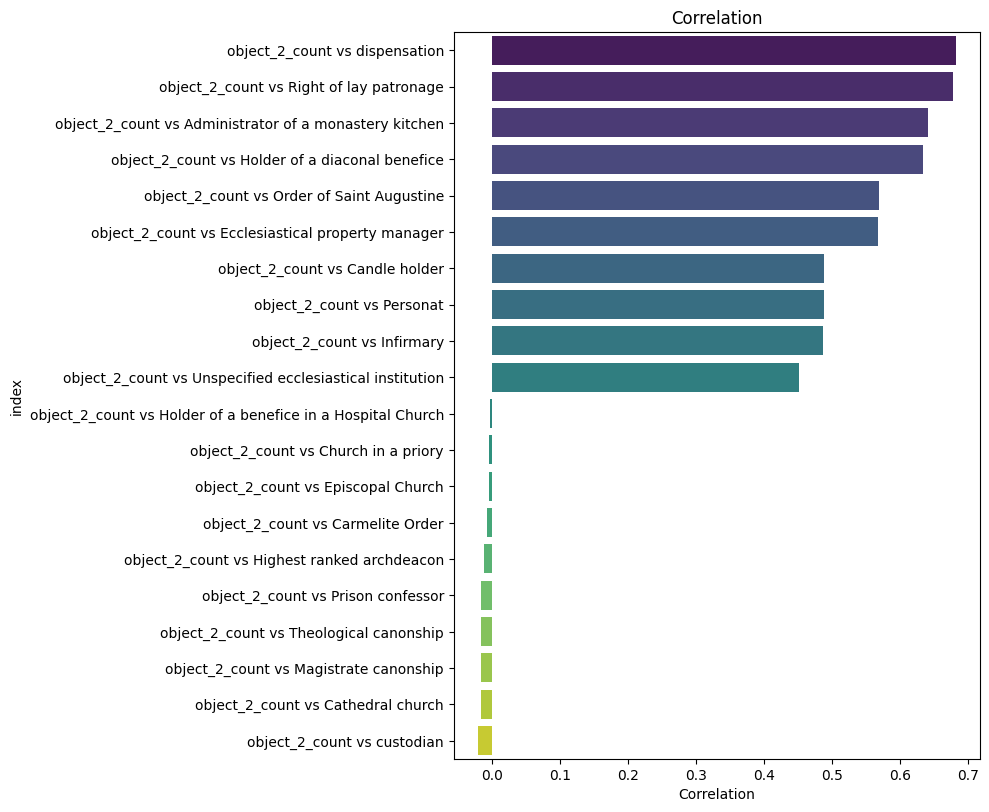

Correlation       P-Value
object_2_count vs dispensation                         0.682013  4.025293e-84
object_2_count vs Right of lay patronage               0.677288  1.490187e-82
object_2_count vs Administrator of a monastery ...     0.640801  2.299259e-71
object_2_count vs Holder of a diaconal benefice        0.633447  2.725702e-69
object_2_count vs Order of Saint Augustine             0.568550  3.504151e-53
object_2_count vs Ecclesiastical property manager      0.567661  5.505717e-53
object_2_count vs Candle holder                        0.488621  1.099431e-37
object_2_count vs Personat                             0.487512  1.692443e-37
object_2_count vs Infirmary                            0.486636  2.376842e-37
object_2_count vs Unspecified ecclesiastical in...     0.452012  7.537314e-32
object_2_count vs Holder of a benefice in a Hos...    -0.003025  9.407688e-01
object_2_count vs Church in a priory                  -0.003201  9.373236e-01
object_2_count vs Episcopal Church                    -0.004555  9.109108e-01
object_2_count vs Carmelite Order                     -0.006461  8.738898e-01
object_2_count vs Highest ranked archdeacon           -0.011866  7.706656e-01
object_2_count vs Prison confessor                    -0.014960  7.132266e-01
object_2_count vs Theological canonship               -0.015109  7.105027e-01
object_2_count vs Magistrate canonship                -0.015109  7.105027e-01
object_2_count vs Cathedral church                    -0.016189  6.908210e-01
object_2_count vs custodian                           -0.020619  6.124393e-01

In [ ]:
dataria.MATH.correlation(endpoint_url=endpoint_url,
    query=query,
                         col1="object_2_count", # the first column you correlate (this is a numerical)
                         col2="name_6_group_concat",  # the second column you correlate (this is a concat-string)
                         edges=10) # truncate the 10 highest and lowest r-values

#### Correlate taxation with types

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?APOSTOLIC_PROVISION_1 ?APOSTOLIC_PROVISION_1_label (SUM(DISTINCT ?number_1155_4) AS ?number_1155_4_sum) (GROUP_CONCAT(DISTINCT ?name_1156_6; SEPARATOR = ",") AS ?name_1156_6_group_concat) WHERE {
  ?APOSTOLIC_PROVISION_1 rdf:type grace:apostolic_provision;
    grace:called ?APOSTOLIC_PROVISION_1_label;
    grace:benefice_taxation ?MONETARY_VALUE_2.
  ?MONETARY_VALUE_2 rdf:type grace:monetary_value;
    grace:money_literal ?number_1155_4.
  ?APOSTOLIC_PROVISION_1 (((grace:object_object|grace:event_object)*)/grace:type_object/grace:called) ?name_1156_6.
}
GROUP BY ?APOSTOLIC_PROVISION_1 ?APOSTOLIC_PROVISION_1_label
LIMIT 10000

"""

/usr/local/lib/python3.11/dist-packages/dataria/MATH.py:93: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, number_1155_4_sum vs pension to number_1155_4_sum vs apostolic provision
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  143 non-null    float64
 1   P-Value      143 non-null    float64
dtypes: float64(2)
memory usage: 3.4+ KB
None


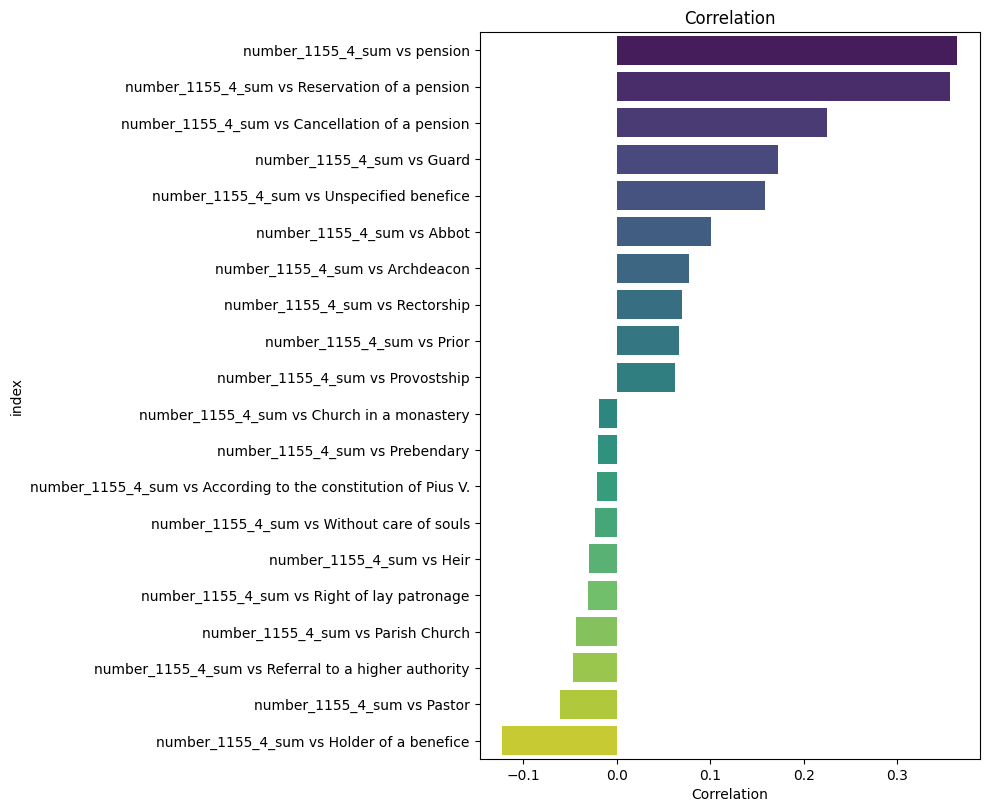

Correlation        P-Value
number_1155_4_sum vs pension                           0.364016  2.884766e-167
number_1155_4_sum vs Reservation of a pension          0.356030  1.379746e-159
number_1155_4_sum vs Cancellation of a pension         0.224514   4.399641e-62
number_1155_4_sum vs Guard                             0.172751   4.233646e-37
number_1155_4_sum vs Unspecified benefice              0.158351   2.265968e-31
number_1155_4_sum vs Abbot                             0.100497   1.754354e-13
number_1155_4_sum vs Archdeacon                        0.077571   1.347208e-08
number_1155_4_sum vs Rectorship                        0.070310   2.647287e-07
number_1155_4_sum vs Prior                             0.066412   1.168229e-06
number_1155_4_sum vs Provostship                       0.061877   5.943759e-06
number_1155_4_sum vs Church in a monastery            -0.019290   1.583885e-01
number_1155_4_sum vs Prebendary                       -0.020316   1.374030e-01
number_1155_4_sum vs According to the constitut...    -0.020748   1.292408e-01
number_1155_4_sum vs Without care of souls            -0.023381   8.732894e-02
number_1155_4_sum vs Heir                             -0.030055   2.795759e-02
number_1155_4_sum vs Right of lay patronage           -0.030297   2.671736e-02
number_1155_4_sum vs Parish Church                    -0.043239   1.562630e-03
number_1155_4_sum vs Referral to a higher autho...    -0.046359   6.957843e-04
number_1155_4_sum vs Pastor                           -0.060342   1.006506e-05
number_1155_4_sum vs Holder of a benefice             -0.122317   2.791562e-19

In [ ]:
dataria.MATH.correlation(endpoint_url=endpoint_url,
    query=query,
                         col1="number_1155_4_sum", # the first column you correlate (this is a numerical)
                         col2="name_1156_6_group_concat",  # the second column you correlate (this is a concat-string)
                         edges=10) # truncate the 10 highest and lowest r-values

#### Corrolate object types to each other

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?object_1 ?object_1_label (GROUP_CONCAT(DISTINCT ?name_4; SEPARATOR = ",") AS ?name_4_group_concat) WHERE {
  ?object_1 rdf:type grace:object;
    grace:called ?object_1_label;
    (grace:refers_to|^grace:refers_to) ?type_2.
  ?type_2 rdf:type grace:type;
    grace:called ?name_4.
}
GROUP BY ?object_1 ?object_1_label
LIMIT 10000
"""

<class 'pandas.core.frame.DataFrame'>
Index: 8515 entries, 8559 to 15468
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Var_1        8515 non-null   object 
 1   Var_2        8515 non-null   object 
 2   Correlation  8515 non-null   float64
dtypes: float64(1), object(2)
memory usage: 266.1+ KB
None


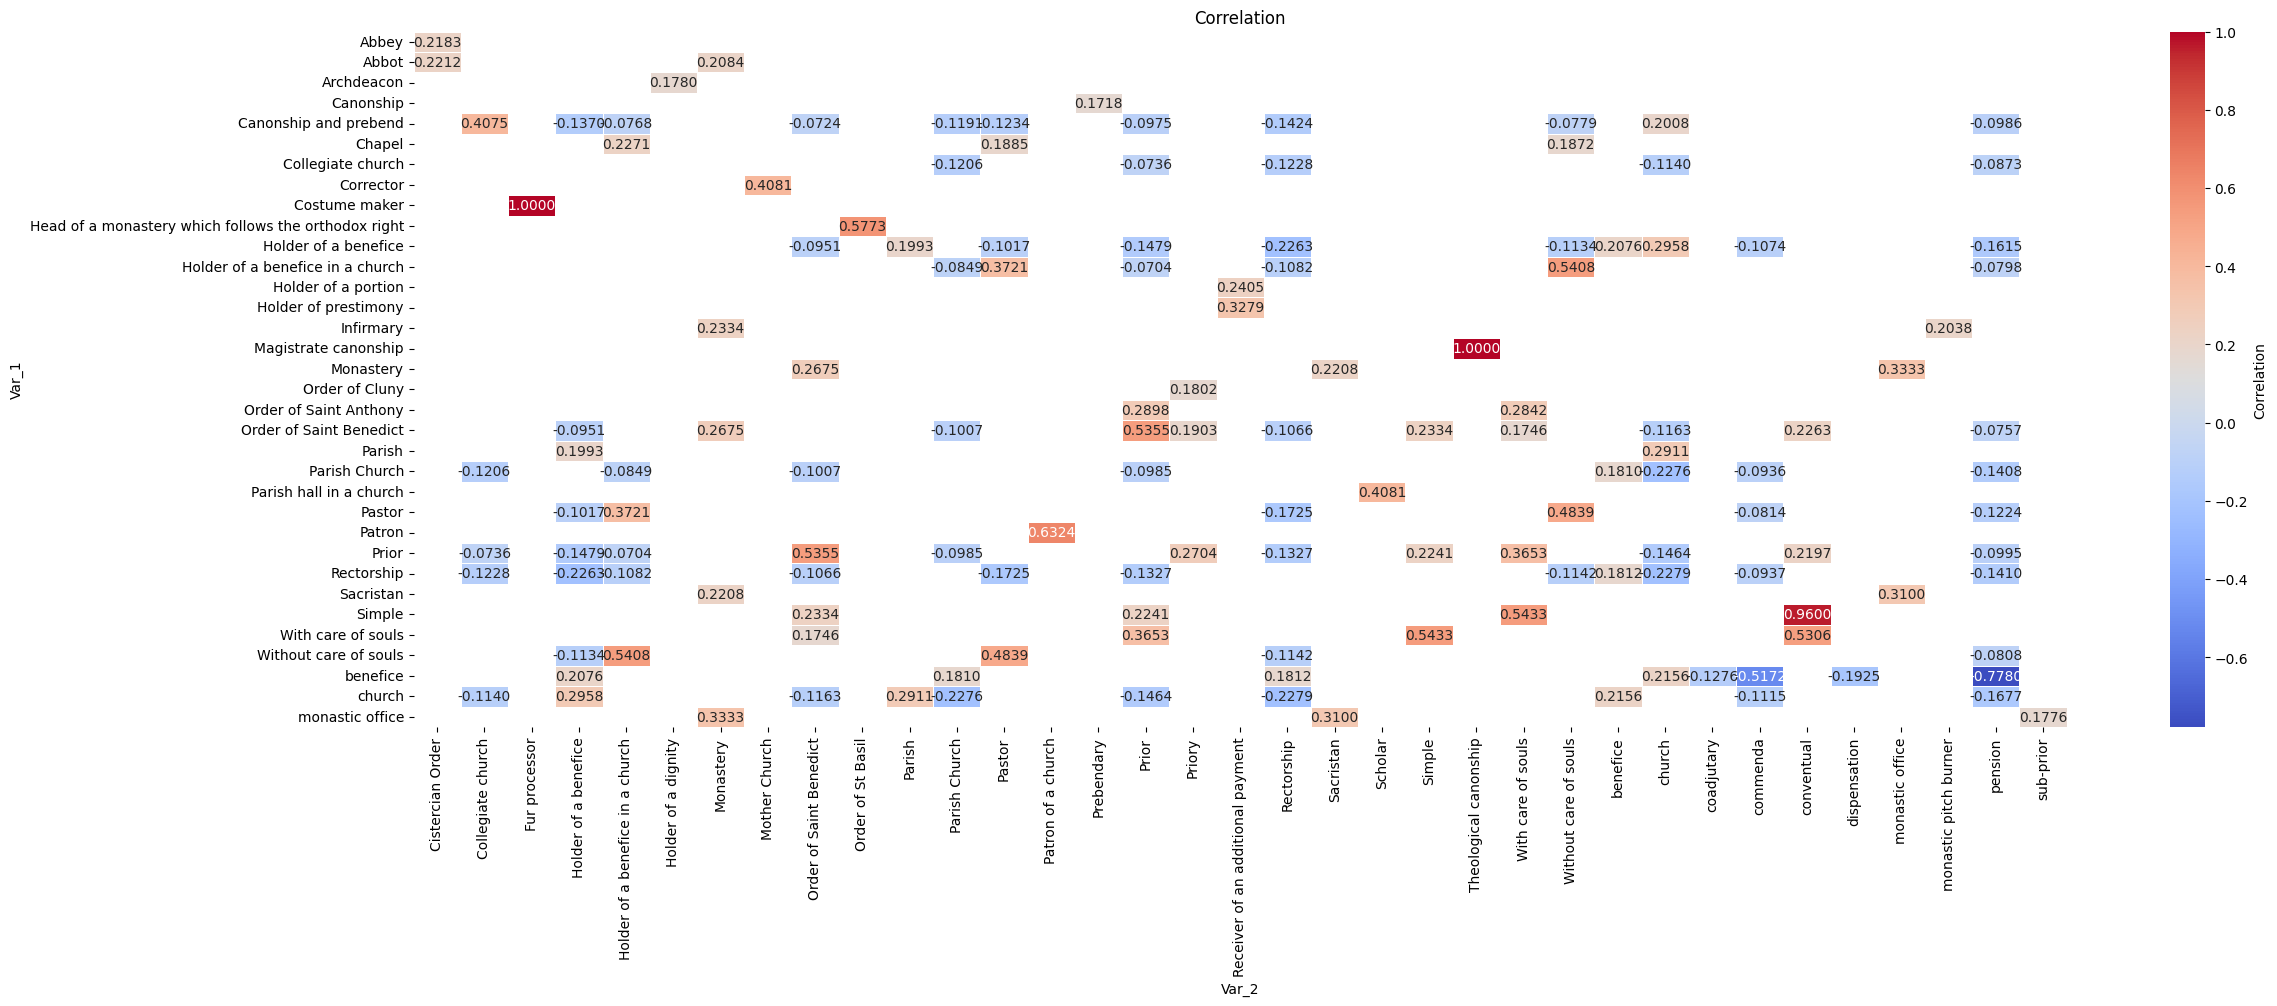

Var_1  \
8559                                Magistrate canonship   
3676                                       Costume maker   
13903                                             Simple   
11266                                             Patron   
5408   Head of a monastery which follows the orthodox...   
...                                                  ...   
6468                                Holder of a benefice   
10650                                      Parish Church   
12990                                         Rectorship   
15462                                           benefice   
15468                                           benefice   

                       Var_2  Correlation  
8559   Theological canonship     1.000000  
3676           Fur processor     1.000000  
13903             conventual     0.959993  
11266     Patron of a church     0.632361  
5408       Order of St Basil     0.577293  
...                      ...          ...  
6468              Rectorship    -0.226288  
10650                 church    -0.227589  
12990                 church    -0.227859  
15462               commenda    -0.517209  
15468                pension    -0.777957  

[100 rows x 3 columns]

In [ ]:
dataria.MATH.correlation(endpoint_url=endpoint_url,
    query=query,
                         col1="name_4_group_concat", # the column you correlate with itself
                         col2="name_4_group_concat", # this is a concat of strings
                         edges=50, # truncate top and bottom 50
                         heatmap_kwargs={'figsize':(25,10)} # fit the size of the plot
                         )

#### Correlate two categories

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
PREFIX g17: <https://g17.dhi-roma.it/resources/>

SELECT DISTINCT ?object_1 ?INSTITUTION_4_filter ?object_1_label (GROUP_CONCAT(DISTINCT ?name_4; SEPARATOR = ",") AS ?name_4_group_concat) WHERE {
  ?object_1 rdf:type grace:object;
    grace:called ?object_1_label;
    (grace:refers_to|^grace:refers_to) ?type_2;
  	grace:pertains_to ?INSTITUTION_2.
  ?type_2 rdf:type grace:type;
    grace:called ?name_4.
  ?INSTITUTION_2 rdf:type grace:institution.
  OPTIONAL {
    ?INSTITUTION_2 (grace:under_jurisdiction+) ?INSTITUTION_4.
    ?INSTITUTION_4 grace:called ?INSTITUTION_4_label.
    VALUES ?INSTITUTION_4 {
      g17:institution_870
    }
  }

  BIND(IF(BOUND(?INSTITUTION_4), STR(?INSTITUTION_4_label), "outside") AS ?INSTITUTION_4_filter)

}
GROUP BY ?object_1 ?object_1_label ?INSTITUTION_4_filter
LIMIT 10000
"""

/usr/local/lib/python3.11/dist-packages/dataria/MATH.py:93: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, Holder of a benefice vs Tarragona to benefice vs outside
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  256 non-null    float64
 1   P-Value      256 non-null    float64
dtypes: float64(2)
memory usage: 6.0+ KB
None


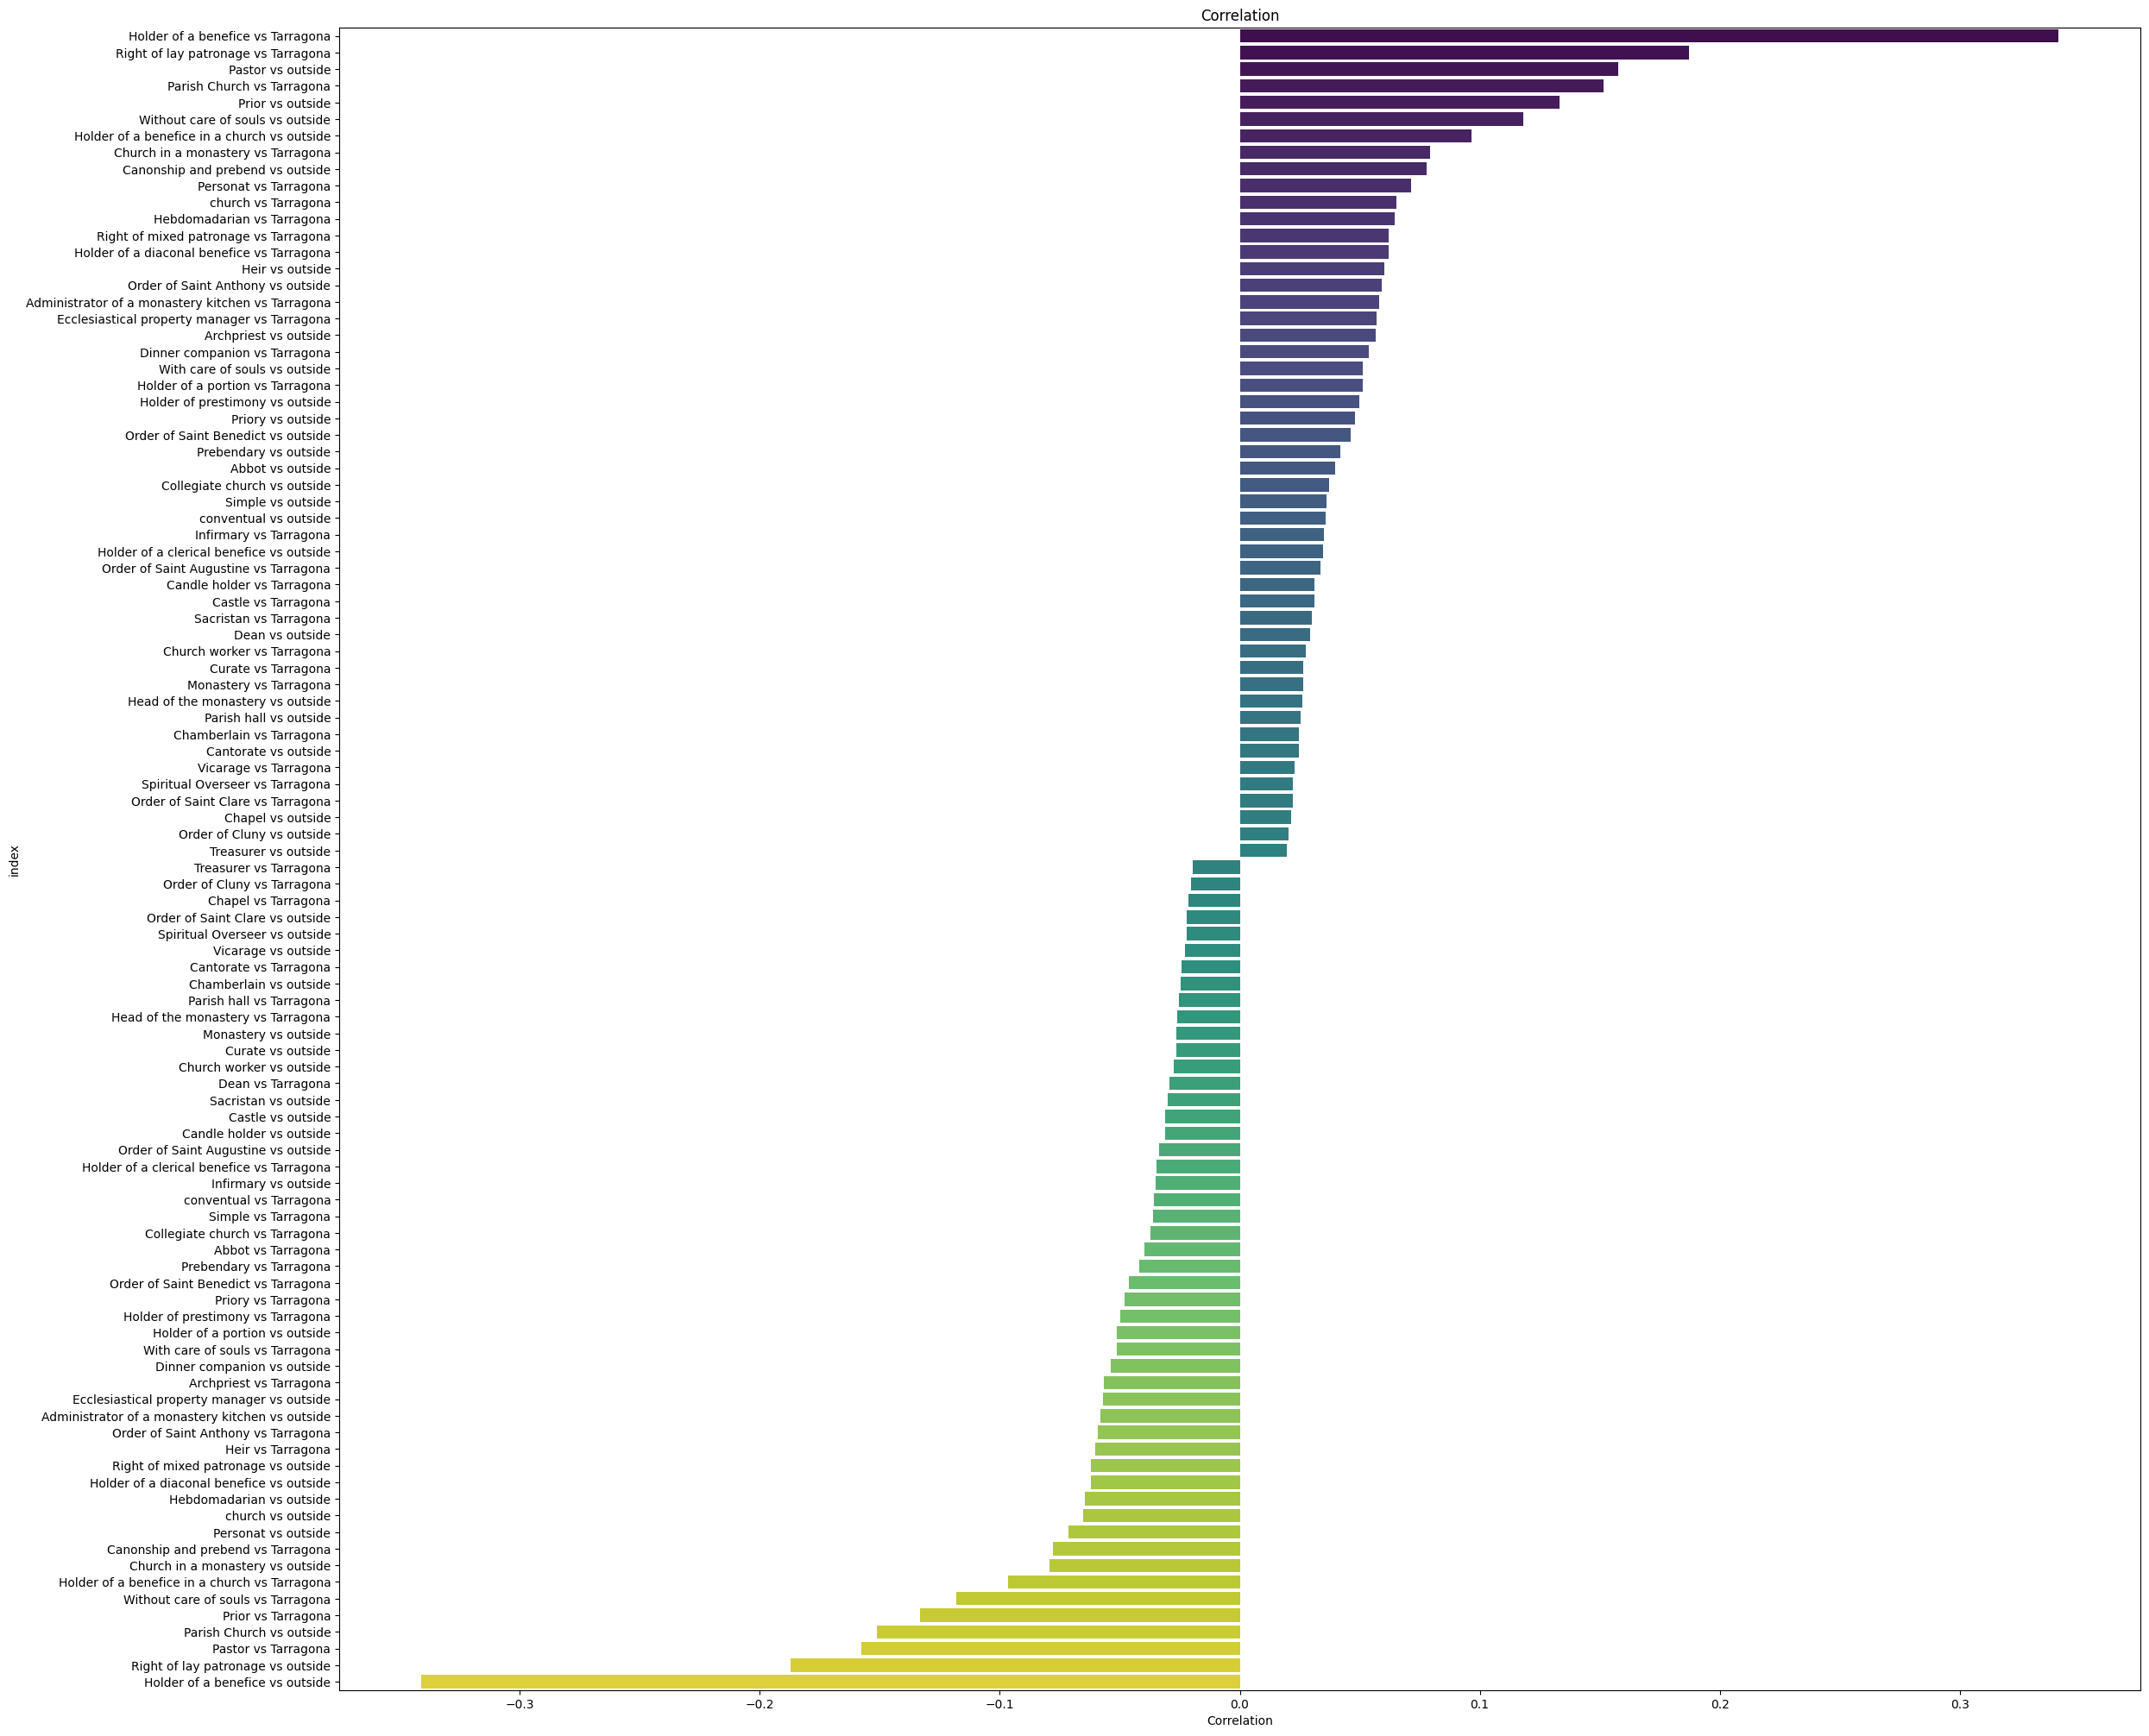

Correlation        P-Value
Holder of a benefice vs Tarragona       0.341129  1.636711e-266
Right of lay patronage vs Tarragona     0.187304   2.382699e-78
Pastor vs outside                       0.157538   1.111629e-55
Parish Church vs Tarragona              0.151394   1.639281e-51
Prior vs outside                        0.133226   3.467755e-40
...                                          ...            ...
Prior vs Tarragona                     -0.133226   3.467755e-40
Parish Church vs outside               -0.151394   1.639281e-51
Pastor vs Tarragona                    -0.157538   1.111629e-55
Right of lay patronage vs outside      -0.187304   2.382699e-78
Holder of a benefice vs outside        -0.341129  1.636711e-266

[100 rows x 2 columns]

In [ ]:
dataria.MATH.correlation(endpoint_url=endpoint_url,
    query=query,
                         col1="name_4_group_concat", # the column you correlate with itself
                         col2="INSTITUTION_4_filter", # this is a concat of strings
                         edges=50, # truncate top and bottom 50
                         heatmap_kwargs={'figsize':(25,20)} # fit the size of the plot
                         )

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
PREFIX g17: <https://g17.dhi-roma.it/resources/>

SELECT DISTINCT ?object_1 ?INSTITUTION_4_label ?object_1_label (GROUP_CONCAT(DISTINCT ?name_4; SEPARATOR = ",") AS ?name_4_group_concat) WHERE {
  ?object_1 rdf:type grace:object;
    grace:called ?object_1_label;
    (grace:refers_to|^grace:refers_to) ?type_2;
  	grace:pertains_to ?INSTITUTION_2.
  ?type_2 rdf:type grace:type;
    grace:called ?name_4.
  ?INSTITUTION_2 rdf:type grace:institution;
  (grace:under_jurisdiction+) ?INSTITUTION_4.
    ?INSTITUTION_4 grace:called ?INSTITUTION_4_label.
}
GROUP BY ?object_1 ?object_1_label ?INSTITUTION_4_label
LIMIT 10000
"""

/usr/local/lib/python3.11/dist-packages/dataria/MATH.py:93: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



<class 'pandas.core.frame.DataFrame'>
Index: 13054 entries, Guard vs Cashel to benefice vs Évora
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Correlation  12947 non-null  float64
 1   P-Value      12947 non-null  float64
dtypes: float64(2)
memory usage: 306.0+ KB
None


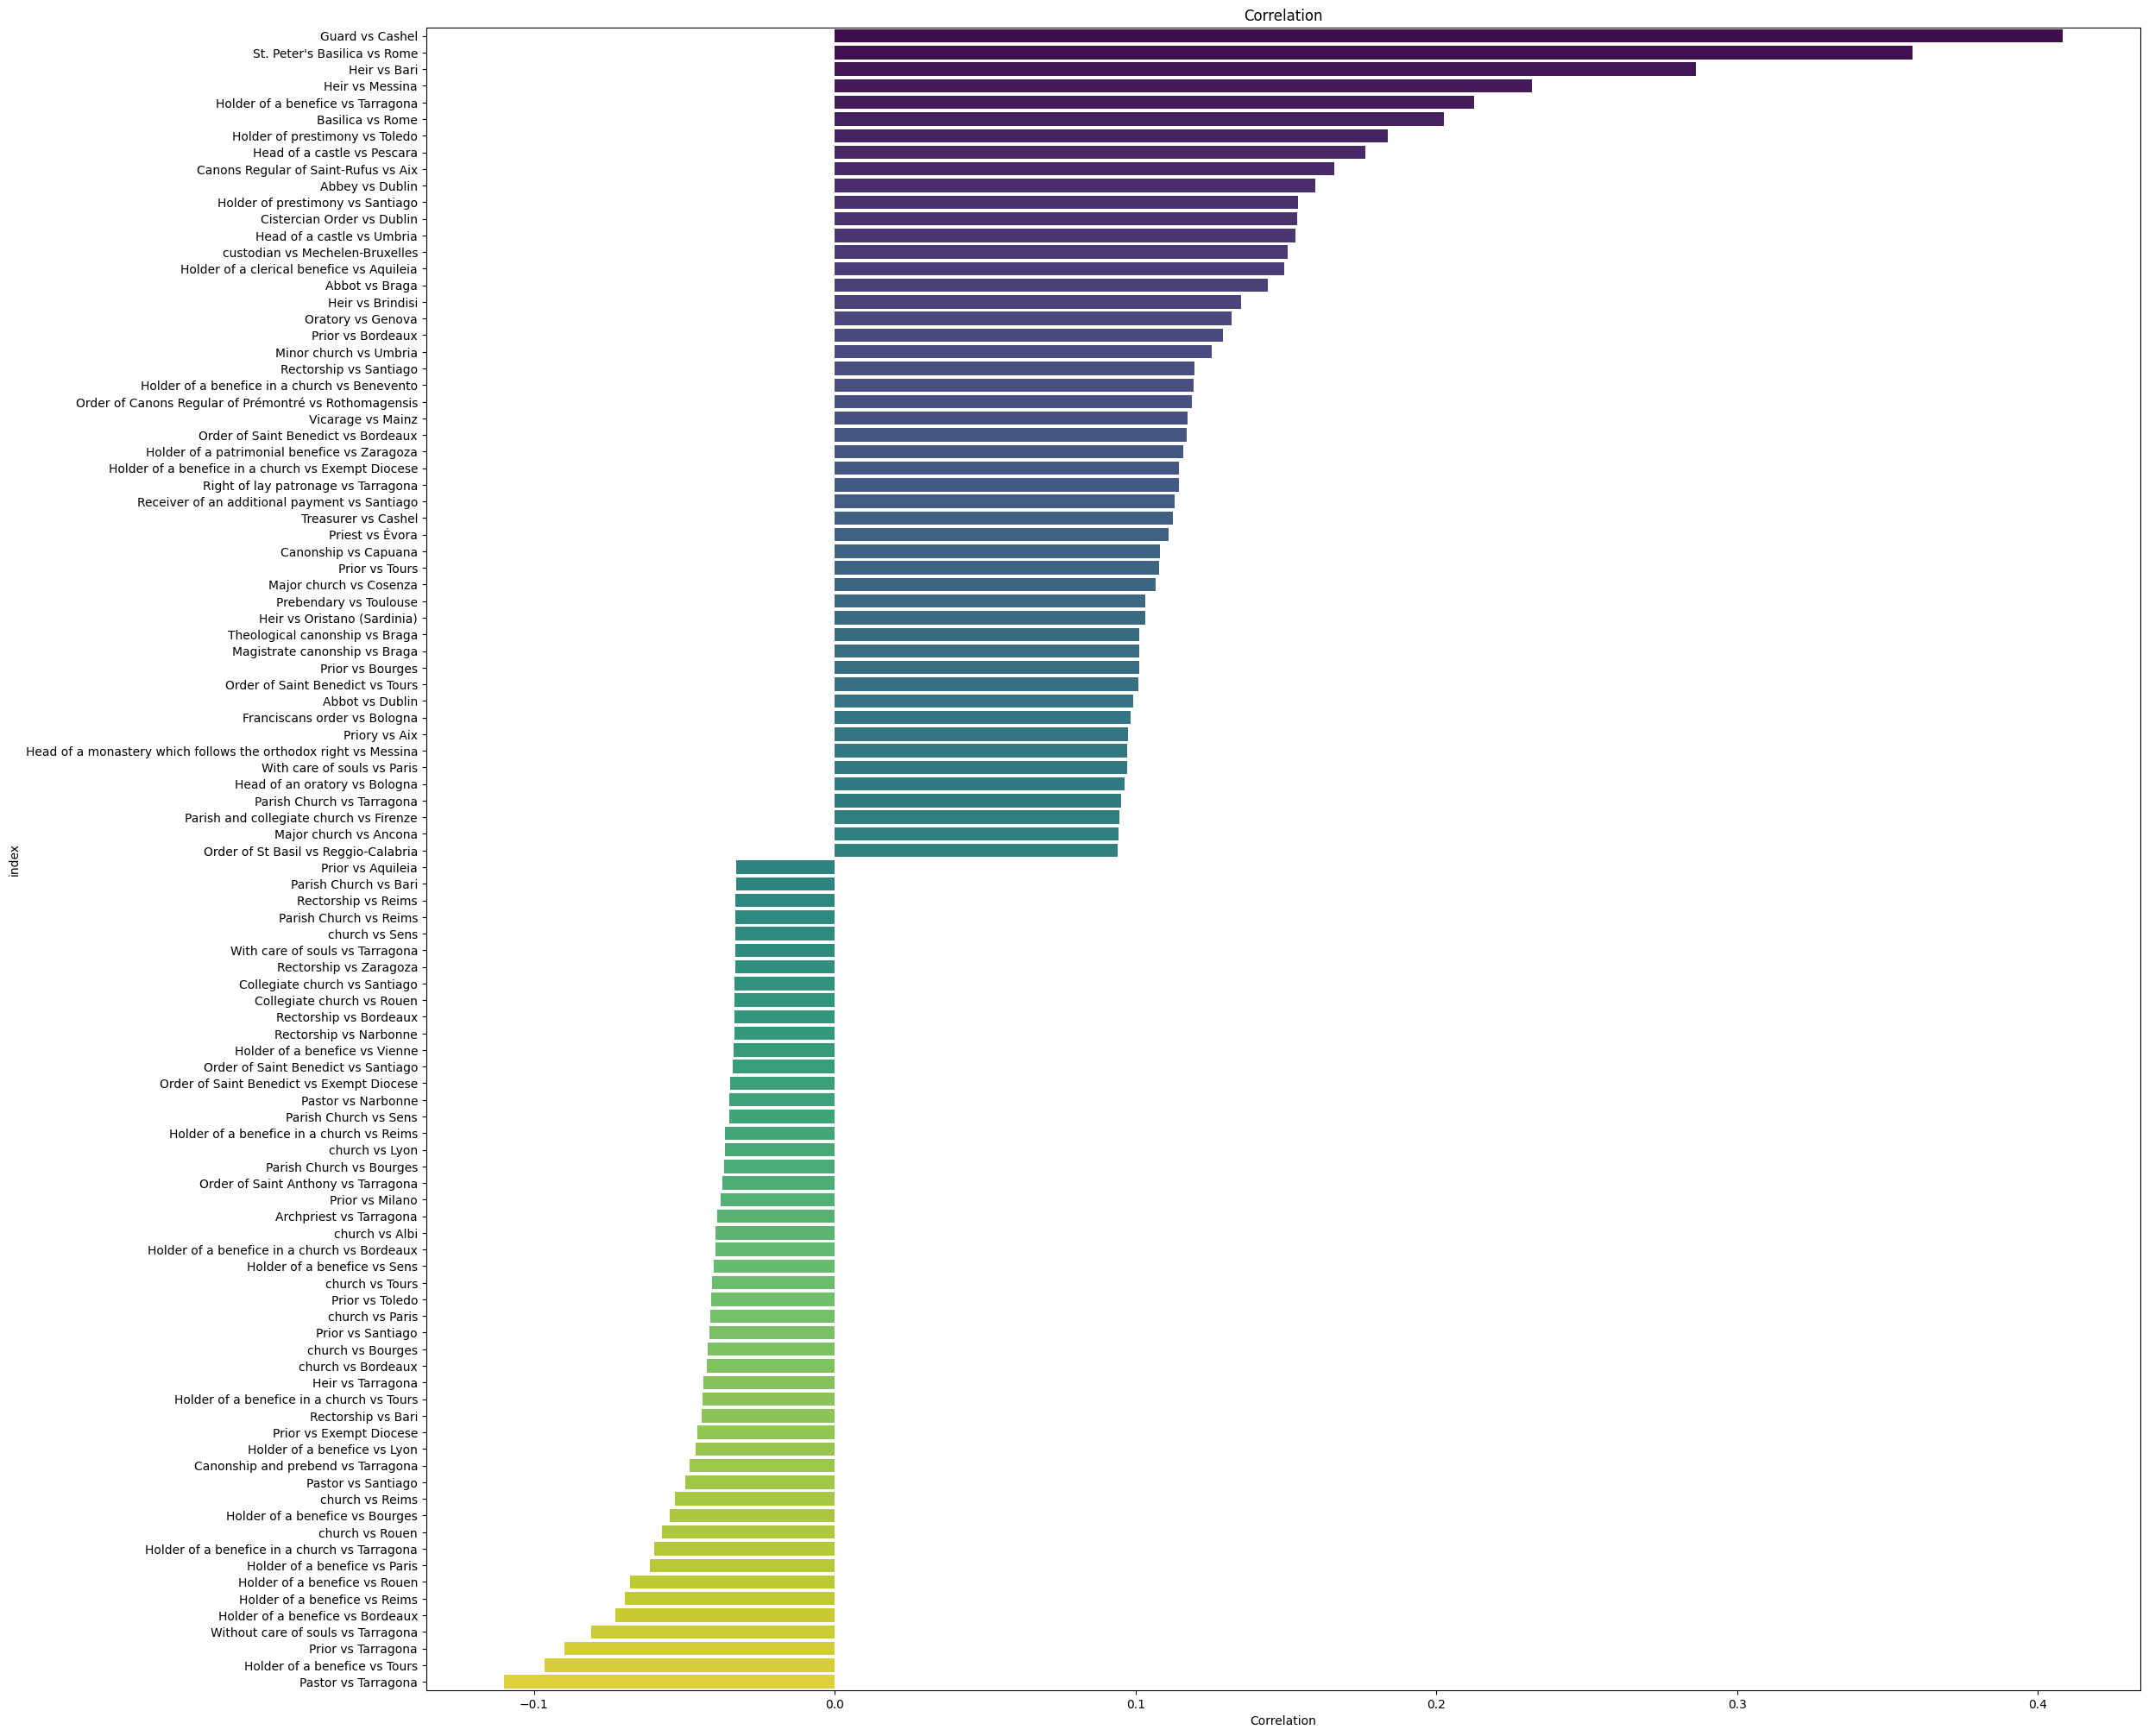

Correlation        P-Value
Guard vs Cashel                        0.408105   0.000000e+00
St. Peter's Basilica vs Rome           0.358257  1.326143e-300
Heir vs Bari                           0.286209  7.849084e-188
Heir vs Messina                        0.231764  4.691953e-122
Holder of a benefice vs Tarragona      0.212443  2.043330e-102
...                                         ...            ...
Holder of a benefice vs Bordeaux      -0.072781   3.172724e-13
Without care of souls vs Tarragona    -0.081022   4.878581e-16
Prior vs Tarragona                    -0.089696   2.550549e-19
Holder of a benefice vs Tours         -0.096565   3.741210e-22
Pastor vs Tarragona                   -0.109889   3.029049e-28

[100 rows x 2 columns]

In [ ]:
dataria.MATH.correlation(endpoint_url=endpoint_url,
    query=query,
                         col1="name_4_group_concat", # the column you correlate with itself
                         col2="INSTITUTION_4_label", # this is a concat of strings
                         edges=50, # truncate top and bottom 50
                         heatmap_kwargs={'figsize':(25,20)} # fit the size of the plot
                         )

### Set Intersections

#### Show how often sets of features intersect

In [ ]:
query="""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX g17: <https://g17.dhi-roma.it/resources/>
PREFIX grace: <https://g17.dhi-roma.it/ontology/>
SELECT DISTINCT ?item (GROUP_CONCAT(DISTINCT ?name_1156_4; SEPARATOR = ",") AS ?set) WHERE {
  ?OBJECT_1 rdf:type grace:object;
    grace:called ?item;
    grace:type_object ?TYPE_2.
  ?TYPE_2 rdf:type grace:type;
    grace:called ?name_1156_4.
  ?OBJECT_1 grace:in_diocese g17:institution_495. # 99 = Barcelona, 200 = Cologne, 495 = Rouen
}
GROUP BY ?item ?OBJECT_1
LIMIT 10000
"""

In [ ]:
upset_kwargs = {
    'show_counts': True,
    'show_percentages': True,
    'sort_by':'cardinality',
    # 'max_subset_rank':5,
    # 'min_subset_size':'2%',
}

/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:795: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/usr/local/lib/python3.11/dist-packages/upsetplot/plotting.py:796: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

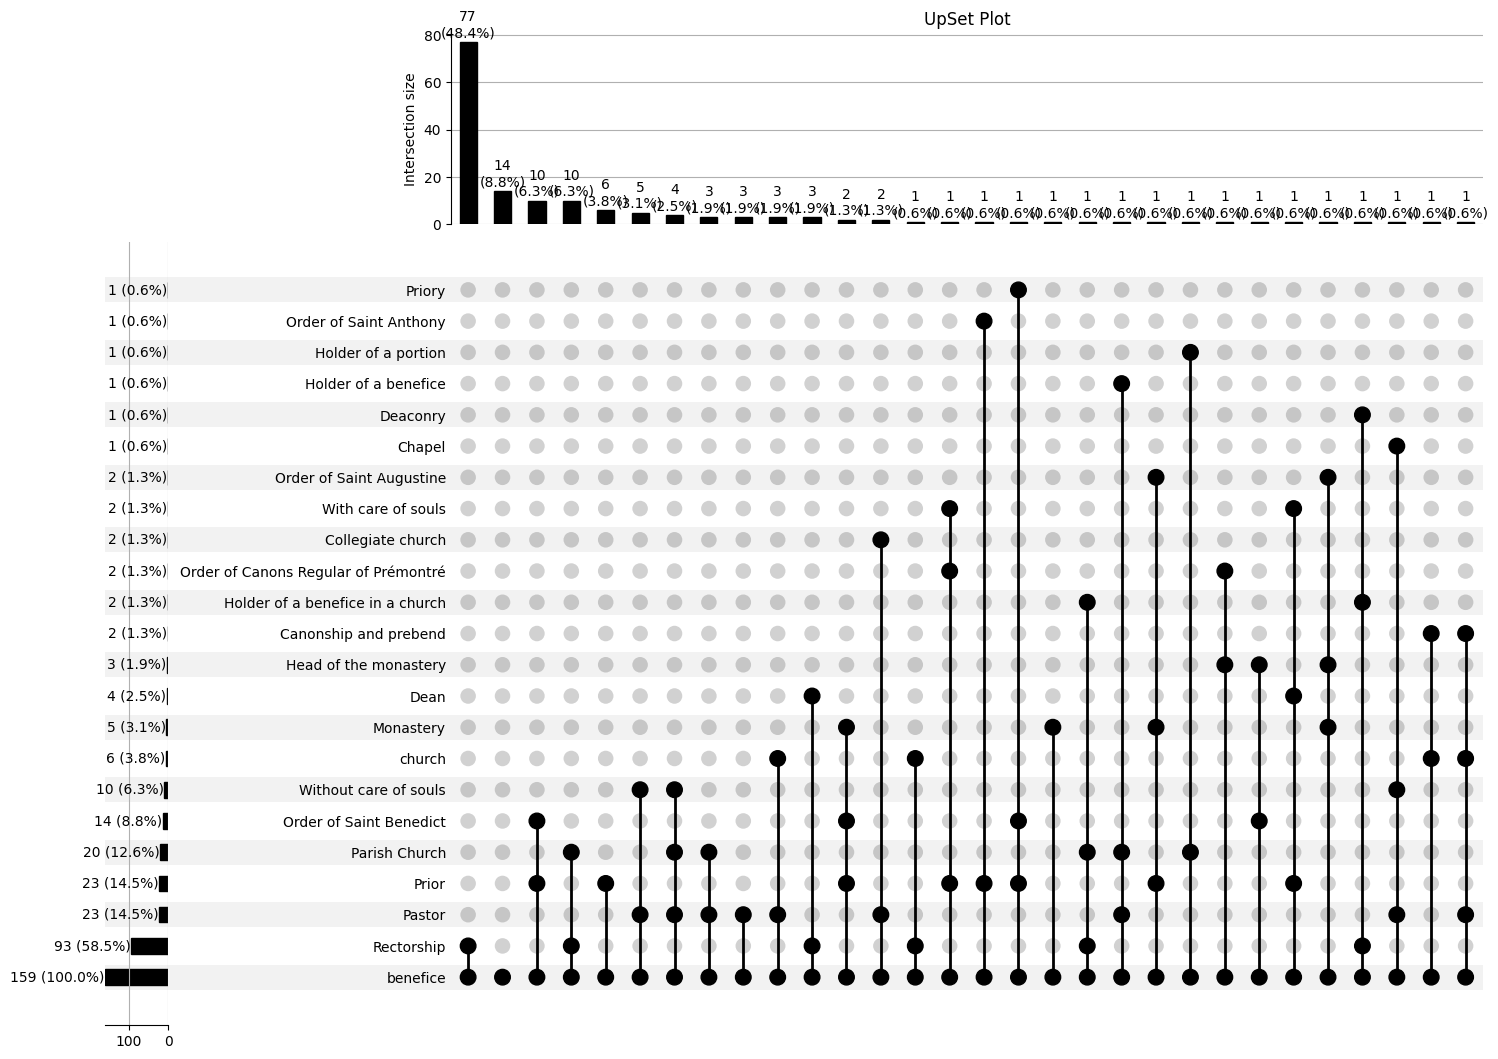

<class 'pandas.core.series.Series'>
MultiIndex: 30 entries, (np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_) to (np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.False_, np.False_, np.False_, np.False_, np.False_, np.True_, np.True_)
Series name: None
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 5.3 KB


item  Canonship and prebend  Chapel  Collegiate church  \
0    BENEFICE 10344                      0       0                  0   
1     BENEFICE 3057                      0       0                  0   
2     BENEFICE 4310                      0       0                  0   
3     BENEFICE 3001                      1       0                  0   
4     BENEFICE 7622                      0       0                  0   
..              ...                    ...     ...                ...   
154   BENEFICE 4251                      0       0                  0   
155   BENEFICE 8781                      0       0                  0   
156   BENEFICE 4334                      0       0                  0   
157   BENEFICE 4266                      0       0                  0   
158   BENEFICE 4255                      0       0                  0   

     Deaconry  Dean  Head of the monastery  Holder of a benefice  \
0           0     0                      0                     0   
1           0     0                      0                     0   
2           0     0                      0                     0   
3           0     0                      0                     0   
4           0     0                      0                     0   
..        ...   ...                    ...                   ...   
154         0     0                      0                     0   
155         0     0                      0                     0   
156         0     0                      0                     0   
157         0     0                      0                     0   
158         0     0                      0                     0   

     Holder of a benefice in a church  Holder of a portion  ...  \
0                                   0                    0  ...   
1                                   0                    0  ...   
2                                   0                    0  ...   
3                                   0                    0  ...   
4                                   0                    0  ...   
..                                ...                  ...  ...   
154                                 0                    0  ...   
155                                 0                    0  ...   
156                                 0                    0  ...   
157                                 0                    0  ...   
158                                 0                    0  ...   

     Order of Saint Benedict  Parish Church  Pastor  Prior  Priory  \
0                          0              0       0      0       0   
1                          0              1       0      0       0   
2                          1              0       0      1       0   
3                          0              0       0      0       0   
4                          0              0       0      0       0   
..                       ...            ...     ...    ...     ...   
154                        0              1       1      0       0   
155                        0              0       0      0       0   
156                        1              0       0      1       0   
157                        0              0       0      0       0   
158                        0              0       0      0       0   

     Rectorship  With care of souls  Without care of souls  benefice  church  
0             0                   0                      0         1       0  
1             1                   0                      0         1       0  
2             0                   0                      0         1       0  
3             0                   0                      0         1       1  
4             1                   0                      0         1       0  
..          ...                 ...                    ...       ...     ...  
154           0                   0                      1         1       0  
155           0                   0        

In [ ]:
dataria.MATH.upset(endpoint_url=endpoint_url,query=query,
                         col_item="item", # the column you correlate with itself
                         col_sets="set", # this is a concat of strings
                         **upset_kwargs
                         )